In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
#load csv file
data_module = pd.read_csv("weatherHistory1.csv")
data_module.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
data_module.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [4]:
data_module.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
#edrop unwanted column from given dataset
data_module  = data_module.loc[:,['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)', 
                'Pressure (millibars)','Apparent Temperature (C)',]]
data_module.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Apparent Temperature (C)
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13,7.388889
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,7.227778
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94,9.377778
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41,5.944444
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51,6.977778


In [6]:
# #Rename the column name from the given dataset
# data_module.rename(columns = {'Temperature (C)':'x1','Humidity':'x2','Wind Speed (km/h)':'x3','Wind Bearing (degrees)':'x4',
#                      'Visibility (km)':'x5', 'Pressure (millibars)':'x6','Apparent Temperature (C)':'y'}, inplace = True)
# data_module.head()

In [7]:
#check the null value
data_module.isnull().sum()

Temperature (C)             0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Apparent Temperature (C)    0
dtype: int64

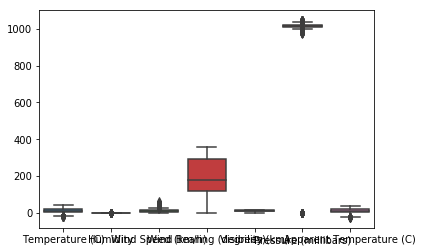

In [8]:
#Replace null values by mean
data_module.replace(np.NaN,data_module.mean(), inplace = True)
data_module.head()
sb.boxplot(data=data_module)


In [9]:
#check datatypes from given dataset
data_module.dtypes

Temperature (C)             float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Pressure (millibars)        float64
Apparent Temperature (C)    float64
dtype: object

In [10]:
#check the duplicate value from the given dataset
data_module.drop_duplicates(keep=False,inplace=True)
print("duplicate value \n",data_module.duplicated().sum())


duplicate value 
 0


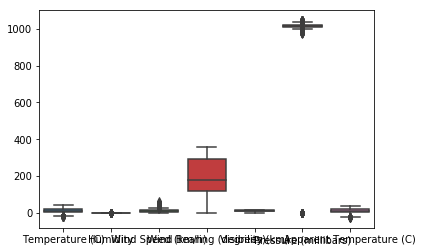

In [11]:
sb.boxplot(data = data_module)

In [12]:
data_module.skew()

Temperature (C)             0.094236
Humidity                   -0.715681
Wind Speed (km/h)           1.113451
Wind Bearing (degrees)     -0.154675
Visibility (km)            -0.498227
Pressure (millibars)       -8.442908
Apparent Temperature (C)   -0.058157
dtype: float64

In [13]:
#feature scalling
data_module = (data_module - data_module.min())/data_module.max()-data_module.min()
data_module.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Apparent Temperature (C)
0,22.606435,0.89,0.221130,0.699164,0.983,0.970135,28.608929
1,22.603511,0.86,0.223399,0.721448,0.983,0.970613,28.604834
2,22.604068,0.89,0.061523,0.568245,0.929,0.970909,28.659479
3,22.576782,0.83,0.220877,0.749304,0.983,0.971358,28.572216
4,22.588476,0.83,0.172970,0.721448,0.983,0.971454,28.598480


In [14]:
#data spliting
def split(data_module):
 
    train_data = int(0.70*len(data_module))   
    test_data = len(data_module) - train_data 
    print("original data file:",data_module.shape)

    data_module.head()
    X = data_module.drop(columns="Apparent Temperature (C)")
    y = data_module["Apparent Temperature (C)"]

    x_train = np.array(X[:train_data]) 
    y_train =np.array(y[:train_data])
    x_test = np.array(X[train_data:])
    y_test = np.array(y[train_data:]) 
    print("\ntrain data and test data file shape:")
    print(x_train.shape) 
    print(y_train.shape)   
    print(x_test.shape)  
    print(y_test.shape)

#     y_train = y_train.reshape(-1,1)
#     print(y_train)
#     y_test = y_test.reshape(-1,1)
#     print(y_test)

    return x_train,y_train,x_test,y_test

x_train,y_train,x_test,y_test=split(data_module)


original data file: (96307, 7)

train data and test data file shape:
(67414, 6)
(67414,)
(28893, 6)
(28893,)


In [20]:
class Multilinear_regression:
    def __init__(self):
        self.learning_rate = 0.01
        self.epoch = 200
    
    def gradient_descent(self,x_train,y_train,theta_vector):
        for iteration in range(self.epoch):
            hypo = np.dot(theta_vector.T,x_train.T)
            sub_temp = np.subtract(hypo,y_train.T)
            mul_temp= np.dot(sub_temp,x_train)
            div_temp=  np.divide(self.learning_rate,len(x_train))
            theta_vector  = np.subtract(theta_vector,div_temp.T)
            
        print("\nhypothesis function value:",hypo.shape)
        print("substract ",sub_temp.shape)
        print("multiplication ",mul_temp.shape)
        print("division",div_temp.shape)
        print("theta shape",theta_vector.shape)
        
        return theta_vector
    
    def predict(self,x_test,theta_vector):
        
        y_predict = np.dot(theta_vector.T,x_test.T)
        y_predict=y_predict.T
        print("test_data shape",x_test.shape)
        print("predict data",y_predict.shape)
        return y_predict
  
    def accuracy(self, y_test, y_predict):
        total_error = 0
        for i in range(0, len(y_test)):
            total_error += abs((y_predict[i] - y_test[i]) / y_test[i])
        total_error = (total_error / len(y_test))
        accuracy = 1 - total_error
        return accuracy * 100



def main(x_train,y_train,x_test,y_test):
    obj = Multilinear_regression()

    x_train = np.column_stack((np.ones((x_train.shape[0], 1)), x_train))
    print("\nshape of x_train",x_train.shape)
    x_test = np.column_stack((np.ones((x_test.shape[0],1)), x_test))
    print("shape of x_test",x_test.shape)

    col= 6
    theta_vector = np.full((col+1,1),0.80)
    theta_vector = obj.gradient_descent(x_train,y_train,theta_vector)


    y_predict=obj.predict(x_test,theta_vector)
    print(y_predict)
    
    Accuracy = obj.accuracy(y_test,y_predict)
    print("\naccuracy is", Accuracy)         

if __name__ == '__main__':
    
#     col= 6
#     theta_vector = np.full((col+1,1),0.1)
    main(x_train,y_train,x_test,y_test)
    





shape of x_train (67414, 7)
shape of x_test (28893, 7)

hypothesis function value: (1, 67414)
substract  (1, 67414)
multiplication  (1, 7)
division ()
theta shape (7, 1)
test_data shape (28893, 7)
predict data (28893, 1)
[[21.60251083]
 [21.42404208]
 [21.32428743]
 ...
 [21.34020712]
 [21.35915082]
 [21.30083991]]

accuracy is [74.55714286]
